In [152]:
# CH3 Classification

# Imports

# Sklearn
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve

# Data
import pandas as pd
import numpy as np
import sympy as sp

# Visualization
import matplotlib.pyplot as plt
from IPython.display import display

In [58]:
# MNIST data
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [59]:
# Keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [71]:
# Load features and targets
X, y = mnist["data"], mnist["target"]
print(f"Container type: {type(X)} | Element type: {X.dtype}")
print(f"Container type: {type(y)} | Element type: {y.dtype}")

Container type: <class 'numpy.ndarray'> | Element type: float64
Container type: <class 'numpy.ndarray'> | Element type: object


X type: <class 'numpy.ndarray'> | y type: <class 'numpy.ndarray'>


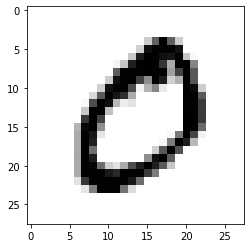

In [65]:
# Inspect
print(f"X type: {type(X)} | y type: {type(y)}")
first_record = X[1]  # Image
some_digit_image = first_record.reshape(28, 28)  # pixel dims
plt.imshow(some_digit_image, cmap='binary')

In [66]:
# Label for above image
print(f"The label for row 1 is the number: {y[0]} of {type(y[0])}")

The label for row 1 is the number: 5 of <class 'str'>


In [67]:
# Divide testing and training 
y = y.astype(np.uint8)  # Convert to byte length unsigned int
bound = 60000
X_train, X_test, y_train, y_test = X[ : bound], X[bound : ], y[ : bound], y[bound : ]

In [69]:
# BINARY CLASSIFIER FOR num 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [75]:
# Get list of accuracies using k folds and SGD Classifier
# scoring="accuracy" requires exact match of predicted label and actual label
# cv tells how many experiments to conduct and (?) also divides the total amount of records
# into total/k folds
score = cross_val_score(sgd_clf, X_train, y_train_5, scoring="accuracy", cv=3)
print(score)

[0.95035 0.96035 0.9604 ]


In [78]:
# CONFUSION MATRIX
# Use cross_val_predict to get set of predictions made on each test fold
# created in the kth cross val experiment

# Predictions for whether a number is 5 (true) or not (false)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [88]:
# The confusion matrix itself
#        _   ?non5  ?5     _
#  non5 |      a    b       |
#  5    |_     c    d      _|
# Each row is a actual class
# Each column is the predicted class
cm = confusion_matrix(y_train_5, y_train_pred)
print(type(cm))
cm_mat = sp.Matrix(cm)
display(cm_mat)
display(cm)

# Summarize
print(f"{cm[0,0]} Correct non5\n{cm[0,1]} False Positives\n{cm[1,0]} False Negatives\n{cm[1,1]} Correct 5")

<class 'numpy.ndarray'>


Matrix([
[53892,  687],
[ 1891, 3530]])

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

53892 Correct non5
687 False Positives
1891 False Negatives
3530 Correct 5


$\text{precision}=\frac{\text{True Positives}}{\text{True Positives}\ +\ False\ Positives}$
$\\ $
$\\ $  
$\\ \text{recall}=\frac{\text{True Positives}}{\text{True Positives}\ +\ False\ Negatives}$

In [93]:
# PRECISION AND RECALL
confusion_matrix_precision = precision_score(y_train_5, y_train_pred)
confusion_matrix_recall = recall_score(y_train_5, y_train_pred)
print(f"How often classifier is correct when claiming image is a 5? {confusion_matrix_precision * 100}\n\
How many 5s are actually detected by the classifier? {confusion_matrix_recall * 100}")

How often classifier is correct when claiming image is a 5? 83.70879772350011
How many 5s are actually detected by the classifier? 65.11713705958311


$F_1=\frac{\text{True Positives}}{\text{True Positives}\ +\ \frac{False\ Negatives\ +\ False\ Positives}{2}}$

In [95]:
# Harmonic mean -- high only if precision and recall are good
confusion_matrix_f1_score = f1_score(y_train_5, y_train_pred)
print(f"F1 score: {confusion_matrix_f1_score}")

F1 score: 0.7325171197343846


In [97]:
# PRECISION RECALL TRADE OFF AND CHOOSING THRESHOLDS FOR DECISION FXNS
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [98]:
# Precision recall curve variables
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [103]:
# Types
test_arr = np.array([1,2,3,4,5])
print(test_arr[:-1])
print(f"Precisions type: {type(precisions)}")
print(f"Recalls type: {type(recalls)}")
print(f"Thresholds type: {type(thresholds)}")

[1 2 3 4]
Precisions type: <class 'numpy.ndarray'>
Recalls type: <class 'numpy.ndarray'>
Thresholds type: <class 'numpy.ndarray'>


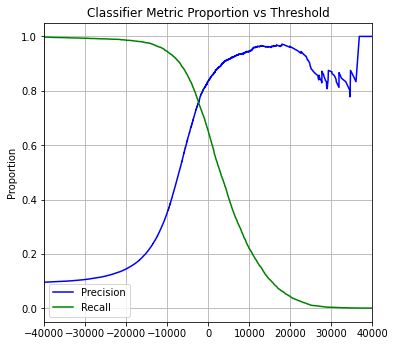

In [142]:
# Plot it
generic_x = np.arange(0., 5., 0.2)

# Always a <class 'Figure'> obj first
fig = plt.figure()

# Size
fig.set_size_inches(20, 5.5)

# # Subplot 1
# ax1 = fig.add_subplot(131)
# ax1.plot(thresholds, precisions[:-1], "b")

# # Subplot 2
# ax2 = fig.add_subplot(132)
# ax2.plot(thresholds, recalls[:-1], "g")

# Subplot 3
ax3 = fig.add_subplot(133)
ax3.plot(thresholds, precisions[:-1], "b-", label="Precision")
ax3.plot(thresholds, recalls[:-1], "g-", label="Recall")
ax3.legend(loc="lower left")
ax3.set_xlim([-40000, 40000])
ax3.set_title("Classifier Metric Proportion vs Threshold")
ax3.set_ylabel("Proportion")
ax3.grid()

# Save it
fig.savefig("./figures/precision_recall_curve.jpg", bbox_inches="tight")

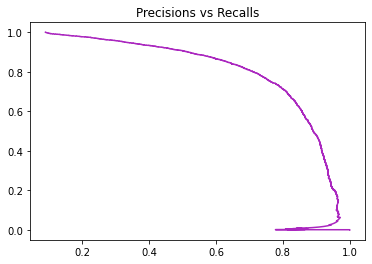

In [150]:
# Another way to visualize the tradeoff
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.plot(precisions, recalls, color="#aa27bf")
ax1.set_title("Precisions vs Recalls")
fig2.savefig("./figures/pred_v_recalls.jpg")

In [ ]:
# ROC CURVE -- Receiver Operating Characteristic
# Understand cross_val_predict
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)